In [ ]:
import os
from google.colab import userdata

os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN")
os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

In [ ]:
!nvidia-smi

Sun Jul 20 20:18:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   46C    P8             12W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install -q "maestro[qwen_2_5_vl]==1.1.0rc2"
!pip install -q supervision==0.26.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.1/821.1 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.

In [ ]:
import cv2
from PIL import Image
from typing import Optional, Tuple, Union
import numpy as np

from maestro.trainer.models.qwen_2_5_vl.inference import predict_with_inputs
from maestro.trainer.models.qwen_2_5_vl.loaders import format_conversation
from maestro.trainer.common.utils.device import parse_device_spec
from qwen_vl_utils import process_vision_info

import supervision as sv
from maestro.trainer.models.qwen_2_5_vl.checkpoints import load_model, OptimizationStrategy

In [ ]:
MODEL_ID_OR_PATH = "Qwen/Qwen2.5-VL-7B-Instruct"
MIN_PIXELS = 512 * 28 * 28
MAX_PIXELS = 2048 * 28 * 28

processor, model = load_model(
    model_id_or_path=MODEL_ID_OR_PATH,
    optimization_strategy=OptimizationStrategy.NONE,
    min_pixels=MIN_PIXELS,
    max_pixels=MAX_PIXELS
)

preprocessor_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


chat_template.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/3.90G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/216 [00:00<?, ?B/s]

In [ ]:
def run_qwen_2_5_vl_inference(
    model,
    processor,
    image: Image.Image,
    prompt: str,
    system_message: Optional[str] = None,
    device: str = "auto",
    max_new_tokens: int = 1024,
) -> Tuple[str, Tuple[int, int]]:
    device = parse_device_spec(device)
    conversation = format_conversation(image=image, prefix=prompt, system_message=system_message)
    text = processor.apply_chat_template(conversation, tokenize=False, add_generation_prompt=True)
    image_inputs, _ = process_vision_info(conversation)

    inputs = processor(
        text=text,
        images=image_inputs,
        return_tensors="pt",
    )

    input_h = inputs['image_grid_thw'][0][1] * 14
    input_w = inputs['image_grid_thw'][0][2] * 14

    response = predict_with_inputs(
        **inputs,
        model=model,
        processor=processor,
        device=device,
        max_new_tokens=max_new_tokens
    )[0]

    return response, (int(input_w), int(input_h))

In [ ]:
def annotate_image(image: Image, detections: sv.Detections) -> Image:
    text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
    thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

    if detections.mask is not None:
        mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)
        image = mask_annotator.annotate(image, detections)
    else:
        box_annotator = sv.BoxAnnotator(color_lookup=sv.ColorLookup.INDEX, thickness=thickness)
        image = box_annotator.annotate(image, detections)

    label_annotator = sv.LabelAnnotator(
        color_lookup=sv.ColorLookup.INDEX,
        text_color=sv.Color.BLACK,
        text_scale=text_scale,
        text_thickness=thickness - 1,
        smart_position=True
    )
    image = label_annotator.annotate(image, detections)
    return image

In [ ]:
IMAGE_PATH = "/content/drive/MyDrive/supervision_object_detection/data/images/input/dog-3.jpeg"
SYSTEM_MESSAGE = None
PROMPT = "Outline the position of chair with man sitting on it and output all the coordinates in JSON format."

image = Image.open(IMAGE_PATH)
resolution_wh = image.size
response, input_wh = run_qwen_2_5_vl_inference(
    model=model,
    processor=processor,
    image=image,
    prompt=PROMPT,
    system_message=SYSTEM_MESSAGE
)

print(response)

```json
[
	{"bbox_2d": [73, 619, 465, 1138], "label": "chair with man sitting on it"}
]
```


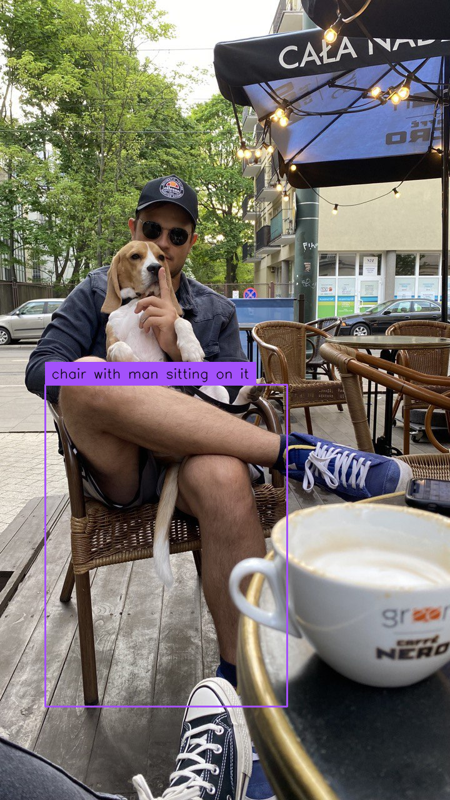

In [ ]:
import supervision as sv

detections = sv.Detections.from_vlm(
    vlm=sv.VLM.QWEN_2_5_VL,
    result=response,
    input_wh=input_wh,
    resolution_wh=resolution_wh
)
image = annotate_image(image=image, detections=detections)
image.thumbnail((800, 800))
image

MULTIPLE OBJECT DETECTION

In [ ]:
IMAGE_PATH = "/content/drive/MyDrive/supervision_object_detection/data/images/input/dog-3.jpeg"
SYSTEM_MESSAGE = None
PROMPT = "Outline the position of chair, dog, table, shoe, light bulb, coffee, hat, glasses, car, tail, umbrella and output all the coordinates in JSON format."

image = Image.open(IMAGE_PATH)
resolution_wh = image.size
response, input_wh = run_qwen_2_5_vl_inference(
    model=model,
    processor=processor,
    image=image,
    prompt=PROMPT,
    system_message=SYSTEM_MESSAGE
)

print(response)

In [ ]:
IMAGE_PATH = "/content/drive/MyDrive/supervision_object_detection/data/images/input/dog-3.jpeg"
SYSTEM_MESSAGE = None
PROMPT = "Outline the position of chair, dog, table, shoe, coffee, hat, glasses, car, tail, umbrella and output all the coordinates in JSON format."

image = Image.open(IMAGE_PATH)
resolution_wh = image.size
response, input_wh = run_qwen_2_5_vl_inference(
    model=model,
    processor=processor,
    image=image,
    prompt=PROMPT,
    system_message=SYSTEM_MESSAGE
)

print(response)

```json
[
	{"bbox_2d": [406, 513, 579, 700], "label": "chair"},
	{"bbox_2d": [518, 551, 728, 732], "label": "chair"},
	{"bbox_2d": [626, 515, 728, 729], "label": "chair"},
	{"bbox_2d": [74, 635, 466, 1136], "label": "chair"},
	{"bbox_2d": [166, 385, 431, 947], "label": "dog"},
	{"bbox_2d": [370, 789, 728, 1288], "label": "table"},
	{"bbox_2d": [213, 1090, 434, 1288], "label": "shoe"},
	{"bbox_2d": [436, 833, 728, 1109], "label": "coffee"},
	{"bbox_2d": [222, 280, 320, 366], "label": "hat"},
	{"bbox_2d": [225, 352, 307, 400], "label": "glasses"},
	{"bbox_2d": [542, 479, 728, 542], "label": "car"},
	{"bbox_2d": [0, 481, 110, 554], "label": "car"},
	{"bbox_2d": [247, 748, 286, 948], "label": "tail"},
	{"bbox_2d": [344, 0, 728, 304], "label": "umbrella"}
]
```


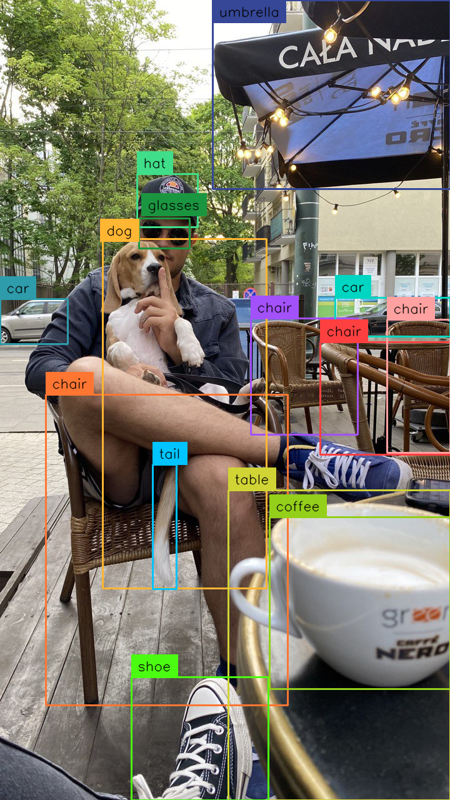

In [ ]:
import supervision as sv

detections = sv.Detections.from_vlm(
    vlm=sv.VLM.QWEN_2_5_VL,
    result=response,
    input_wh=input_wh,
    resolution_wh=resolution_wh
)
image = annotate_image(image=image, detections=detections)
image.thumbnail((800, 800))
image